Re-create the following figure using the `mpg` data set.

<img src="figs/example.png" style="width: 600px;" />

Hints:
- you can make a table with median values using `group_by` and `summarize`
- use `geom_crossbar` to create the vertical line for median values
- use `fct_reorder` to set the levels for `class`

class,cty
<fct>,<dbl>
2seater,15
minivan,16
pickup,13
subcompact,19
midsize,18
compact,20


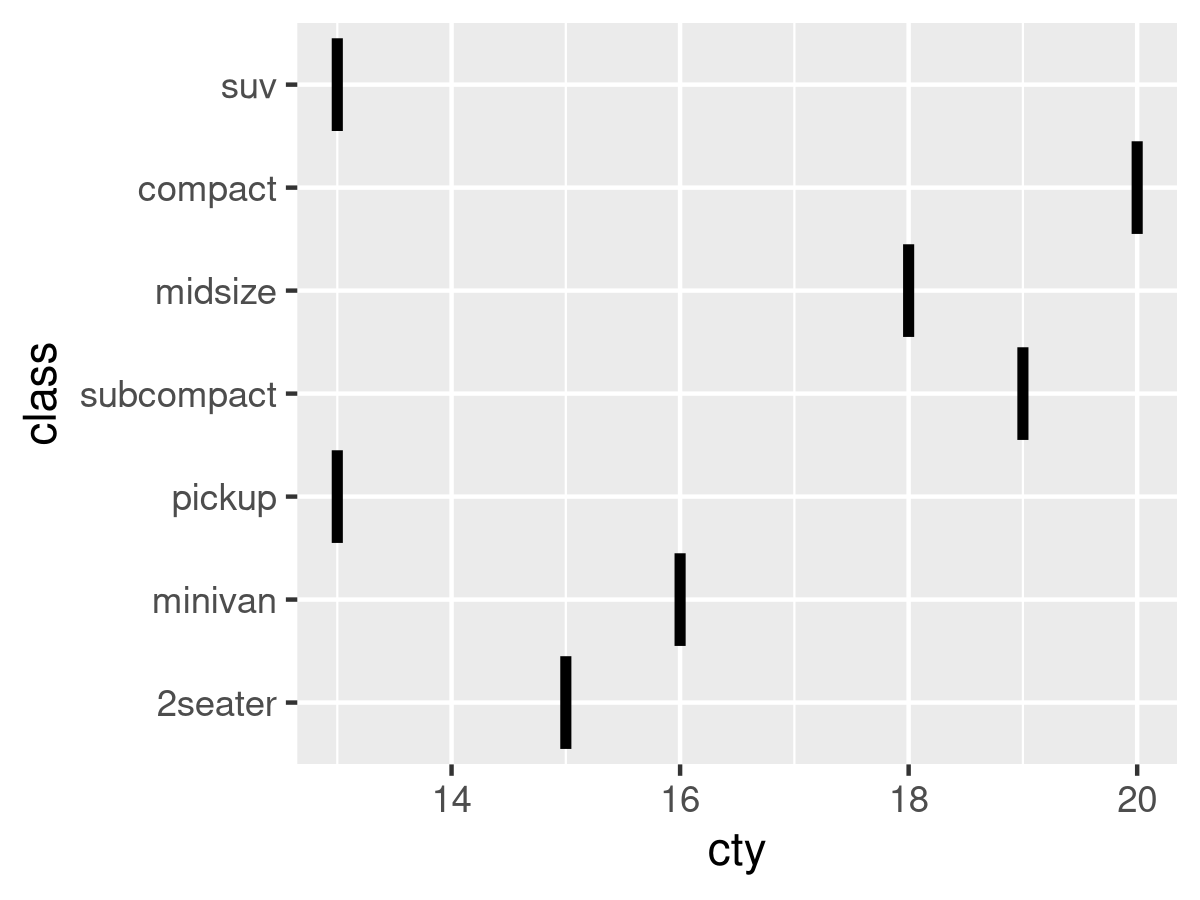

In [37]:
library('tidyverse')

options(repr.plot.res = 300, repr.plot.height = 3, repr.plot.width = 4)

mpg_median = mpg %>%
    group_by(class) %>%
    summarize(cty = median(cty, na.rm = TRUE))

mpg_median %>% head

p = mpg_median %>% ggplot(aes(x = cty, y = class))

p = p + geom_crossbar(xmin = 0, xmax = 0)

# p = p + geom_point(data = mpg, position = position_jitter(w=0, h=.3), alpha = .25)

p